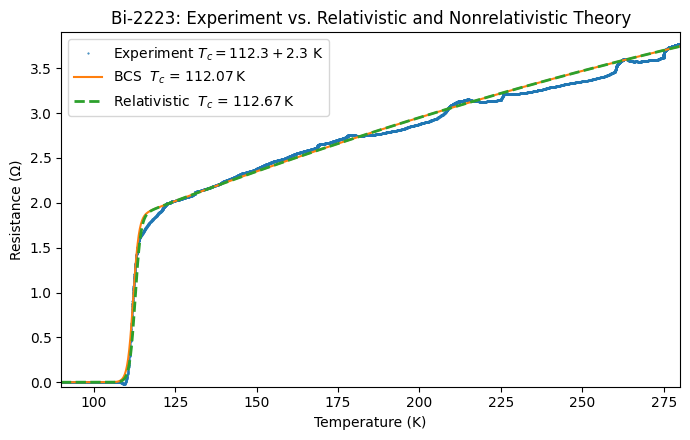

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.loadtxt('superwarm.txt')
T_exp, R_exp = data[:,0], data[:,1]

# load experimental data to be modified

# BCS fit for reference (crude model)
def BCS_model(T, Tc, w, p2, p1, p0):
    quadratic = p2*T**2 + p1*T + p0
    log_drop = 1.0/(1.0 + np.exp((T - Tc)/w))
    return quadratic * (1.0 - log_drop)

# initial guesses:  Tc = 110 K, width = 1 K
norm = T_exp > 150
p2, p1, p0 = np.polyfit(T_exp[norm], R_exp[norm], 2)
initial = [110, 1.0, p2, p1, p0]

popt, _ = curve_fit(BCS_model, T_exp, R_exp, p0=initial, maxfev=10000)
Tc_fit, w_fit, p2_fit, p1_fit, p0_fit = popt

# shift to account for relativistic model from Dirac BdG equation
delta_Tc_rel = 0.6     # 0.5–1 K upward shift
Tc_rel = Tc_fit + delta_Tc_rel

def BCS_clean(T, Tc):
    quadratic = p2_fit*T**2 + p1_fit*T + p0_fit
    log_drop = 1.0/(1.0 + np.exp((T - Tc)/w_fit))
    return quadratic * (1.0 - log_drop)

# Plotting
T_plot = np.linspace(T_exp.min(), T_exp.max(), 1200)

plt.figure(figsize=(7,4.5))
plt.plot(T_exp, R_exp, '.', ms=1, label='Experiment $T_c = 112.3 + 2.3$ K')
plt.plot(T_plot, BCS_clean(T_plot, Tc_fit), label=f'BCS  $T_c$ = {Tc_fit:.2f} K')
plt.plot(T_plot, BCS_clean(T_plot, Tc_rel), '--', lw=2,
         label=f'Relativistic  $T_c$ = {Tc_rel:.2f} K')

plt.xlim(90, 280)
plt.ylim(-0.05, 3.9)
plt.xlabel('Temperature (K)')
plt.ylabel('Resistance (Ω)')
plt.title('Bi‑2223: Experiment vs. Relativistic and Nonrelativistic Theory')
plt.legend()
plt.tight_layout()
plt.show()